## Load Data and Import libraries

In [178]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC

sns.set(style='white', context='notebook', palette='deep')


## Acquire data

In [139]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combine = pd.concat([train.drop('Survived',1),test])


## Explore and analyse dataset

In [140]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [142]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [143]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [144]:
#missing values
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [145]:
train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [146]:
train[['Sex','Survived']].groupby(['Sex']).sum()

,Survived
Sex,
female,233
male,109


In [147]:
survived=train[train['Survived']==1]
not_survived=train[train['Survived']==0]

In [148]:
print(train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


## clean data

In [149]:
train['Age'] = train.Age.fillna(0) 
train['Fare'] = train.Fare.fillna(0)

## Visualizing data

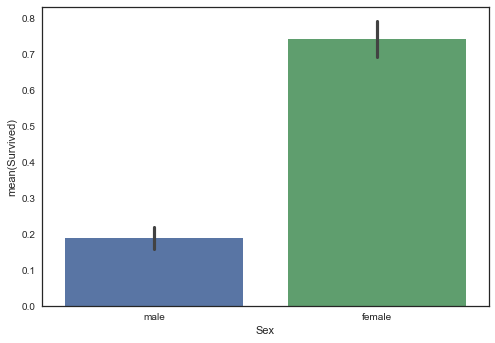

In [150]:
sns.barplot('Sex', 'Survived', data=train)


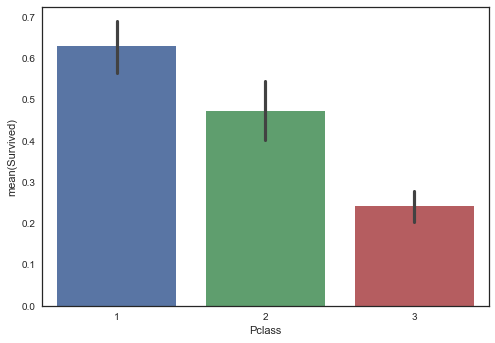

In [151]:
sns.barplot('Pclass','Survived',data=train)

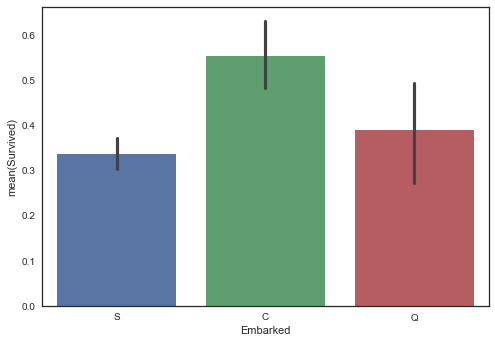

In [152]:
sns.barplot('Embarked', 'Survived', data=train)


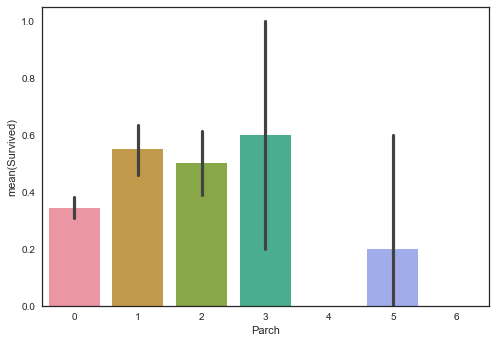

In [153]:
sns.barplot('Parch', 'Survived', data=train)

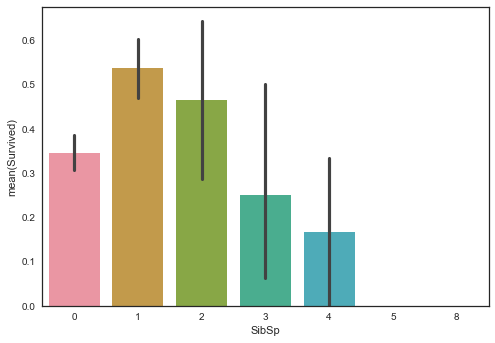

In [154]:
sns.barplot('SibSp', 'Survived', data=train)


In [155]:
train[['SibSp','Survived']].groupby(['SibSp']).sum()

,Survived
SibSp,
0,210
1,112
2,13
3,4
4,3
5,0
8,0


In [156]:
train['Cabin']=train['Cabin'].dropna()
len(train['Cabin'])

891

In [157]:
test['Cabin']=test['Cabin'].dropna()
len(test['Cabin'])

418

In [158]:
train.loc[:,['Survived','Cabin']].dropna().head(8)

,Survived,Cabin
1,1,C85
3,1,C123
6,0,E46
10,1,G6
11,1,C103
21,1,D56
23,1,A6
27,0,C23 C25 C27


In [159]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [160]:
train['Ticket'].nunique()

681

In [161]:
train['Ticket'].count()

891

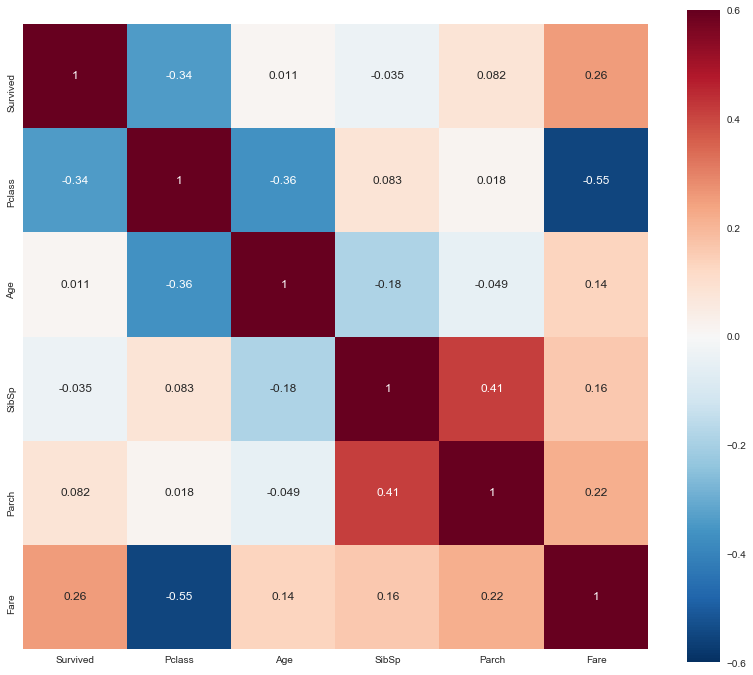

In [162]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [163]:
msurv = train[(train['Survived']==1) & (train['Sex']=="male")]
fsurv = train[(train['Survived']==1) & (train['Sex']=="female")]
mnosurv = train[(train['Survived']==0) & (train['Sex']=="male")]
fnosurv = train[(train['Survived']==0) & (train['Sex']=="female")]


Age
0.00     Axes(0.125,0.125;0.775x0.755)
0.42     Axes(0.125,0.125;0.775x0.755)
0.67     Axes(0.125,0.125;0.775x0.755)
0.75     Axes(0.125,0.125;0.775x0.755)
0.83     Axes(0.125,0.125;0.775x0.755)
0.92     Axes(0.125,0.125;0.775x0.755)
1.00     Axes(0.125,0.125;0.775x0.755)
2.00     Axes(0.125,0.125;0.775x0.755)
3.00     Axes(0.125,0.125;0.775x0.755)
4.00     Axes(0.125,0.125;0.775x0.755)
5.00     Axes(0.125,0.125;0.775x0.755)
6.00     Axes(0.125,0.125;0.775x0.755)
7.00     Axes(0.125,0.125;0.775x0.755)
8.00     Axes(0.125,0.125;0.775x0.755)
9.00     Axes(0.125,0.125;0.775x0.755)
10.00    Axes(0.125,0.125;0.775x0.755)
11.00    Axes(0.125,0.125;0.775x0.755)
12.00    Axes(0.125,0.125;0.775x0.755)
13.00    Axes(0.125,0.125;0.775x0.755)
14.00    Axes(0.125,0.125;0.775x0.755)
14.50    Axes(0.125,0.125;0.775x0.755)
15.00    Axes(0.125,0.125;0.775x0.755)
16.00    Axes(0.125,0.125;0.775x0.755)
17.00    Axes(0.125,0.125;0.775x0.755)
18.00    Axes(0.125,0.125;0.775x0.755)
19.00    Axes(0.125,0

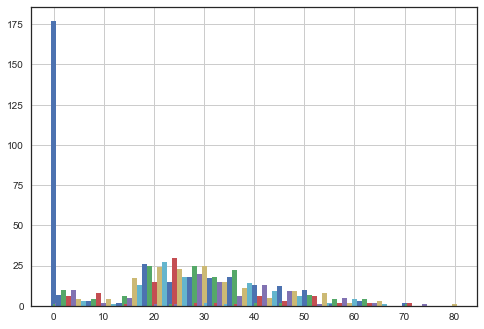

In [164]:
train['Age']=train['Age'].dropna()
train.groupby("Age").Age.hist( bins=1) 

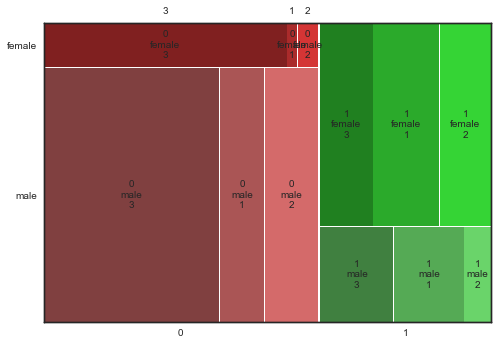

In [165]:
dummy = mosaic(train,["Survived","Sex","Pclass"])


Pclass      1    2    3
Embarked               
C         141   28  101
Q           3    7  113
S         177  242  495


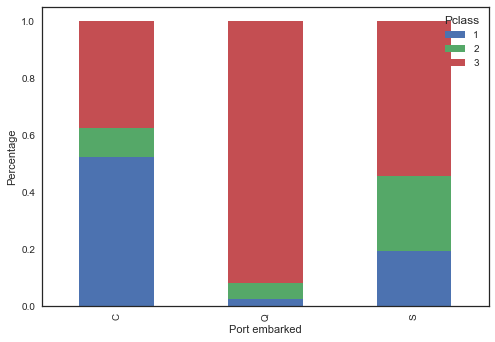

In [166]:
tab = pd.crosstab(combine['Embarked'], combine['Pclass'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

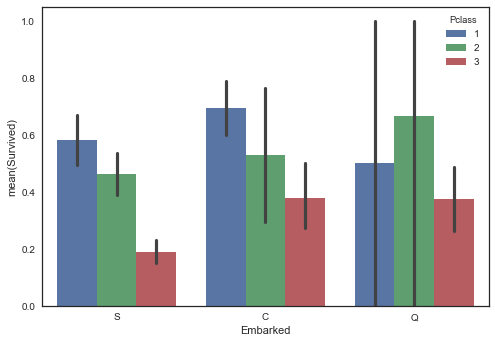

In [167]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=train)


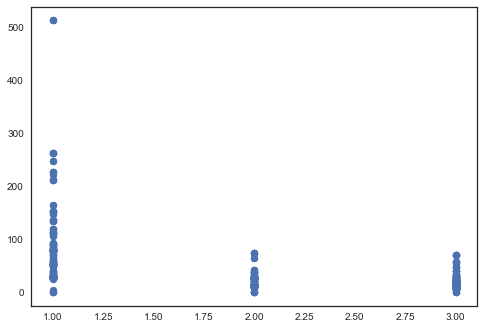

In [168]:
plt.scatter(train['Pclass'],train['Fare'])
    
 

In [169]:
train.loc[:,["Sex","Embarked"]].head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [170]:
combine = pd.concat([train.drop('Survived',1),test])
survived = train['Survived']

combine["Sex"] = combine["Sex"].astype("category")
combine["Sex"].cat.categories = [0,1]
combine["Sex"] = combine["Sex"].astype("int")
combine["Embarked"] = combine["Embarked"].astype("category")
combine["Embarked"].cat.categories = [0,1,2]
combine["Embarked"] = combine["Embarked"].astype("int")
test = combine.iloc[len(train):]
train = combine.iloc[:len(train)]
train['Survived'] = survived

train.loc[:,["Sex","Embarked"]].head()


,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [171]:
cols = ['Sex','Pclass','Age','Embarked','Fare', 'Parch', 'SibSp',
                 'Pclass']


In [172]:
X = train[cols]


In [173]:
y=train['Survived']

In [174]:
log = LogisticRegression()
log = log.fit(X,y)
score = log.score(X,y)
print(score)


0.650953984287


In [175]:
y_prediction = log.predict(test)
y_prediction

ValueError: could not convert string to float: 'C105'

In [182]:
clf_knn = KNeighborsClassifier(
    n_neighbors=10,
    weights='distance'
    )
clf_knn = clf_knn.fit(X,y)
score_knn = cross_val_score(clf_knn, X, y, cv=5).mean()
print(score_knn)



0.704880013987


In [183]:
clf_svm = svm.SVC(
    class_weight='balanced'
    )
clf_svm.fit(X, y)
score_svm = cross_val_score(clf_svm, X, y, cv=5).mean()
print(score_svm)

0.681422816688


In [184]:
bagging = BaggingClassifier(
    KNeighborsClassifier(
        n_neighbors=2,
        weights='distance'
        ),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
    )
clf_bag = bagging.fit(X,y)
score_bag = clf_bag.oob_score_
print(score_bag)

0.700336700337


In [185]:
clf_tree = tree.DecisionTreeClassifier(
    #max_depth=3,\
    class_weight="balanced",\
    min_weight_fraction_leaf=0.01\
    )
clf_tree = clf_tree.fit(X,y)
score_tree = cross_val_score(clf_tree, X, y, cv=5).mean()
print(score_tree)

0.803688647405


In [186]:
clf_rf = RandomForestClassifier(
    n_estimators=1000, \
    max_depth=None, \
    min_samples_split=10 \
    #class_weight="balanced", \
    #min_weight_fraction_leaf=0.02 \
    )
clf_rf = clf_rf.fit(X,y)
score_rf = cross_val_score(clf_rf, X, y, cv=5).mean()
print(score_rf)

0.817153245972


In [188]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 10))

In [190]:
# Logistic Regression
